 training different models on a given data set, and find the one that performs best

### Getting the data for the assignment (similar to the notebook you have seen in class)

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
NOTEBOOK_PATH = os.getcwd()

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(NOTEBOOK_PATH, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings("ignore")

In [3]:
fetch_housing_data()

In [4]:

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()

In [6]:
housing=housing.replace('?',np.nan)
print('Number of instances=%d'%(housing.shape[0]))
print('Number of attributes=%d'%(housing.shape[1]))

print('Number pf missing values:')
for column in housing.columns:
    print('\t%s: %d'%(column,housing[column].isna().sum()))

Number of instances=20640
Number of attributes=10
Number pf missing values:
	longitude: 0
	latitude: 0
	housing_median_age: 0
	total_rooms: 0
	total_bedrooms: 207
	population: 0
	households: 0
	median_income: 0
	median_house_value: 0
	ocean_proximity: 0


### Fix the categories in the categorical variable

In [7]:
d = {'<1H OCEAN':'LESS_1H_OCEAN', 'INLAND':'INLAND', 'ISLAND':'ISLAND', 'NEAR BAY':'NEAR_BAY', 'NEAR OCEAN':'NEAR_OCEAN'}
housing['ocean_proximity'] = housing['ocean_proximity'].map(lambda s: d[s])

### Add 2 more features

In [8]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [9]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


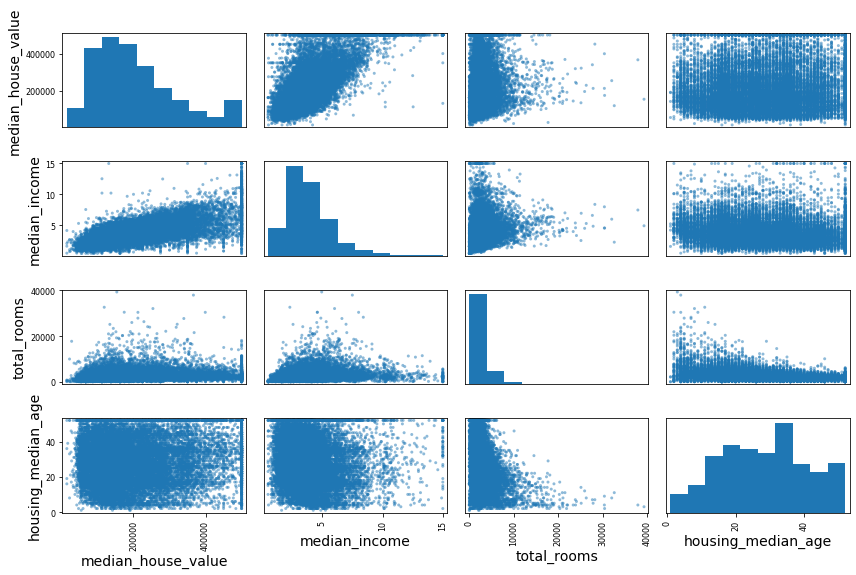

In [10]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

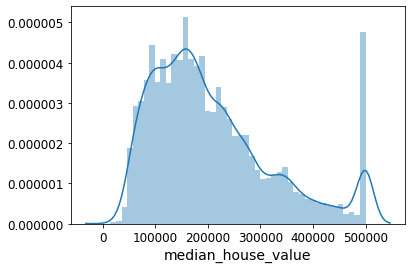

In [11]:
sns.distplot(housing['median_house_value'])

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR_BAY,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR_BAY,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR_BAY,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR_BAY,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR_BAY,6.281853,2.181467


### Fix missing data

In [13]:
incomplete_rows = housing[housing.isnull().any(axis=1)].head()
incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR_BAY,5.761468,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR_BAY,3.830116,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR_BAY,4.048704,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR_BAY,6.102740,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR_BAY,4.633540,2.403727


In [14]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True) 

### Create dummy variables based on the categorical variable

In [15]:
one_hot = pd.get_dummies(housing['ocean_proximity'])
housing = housing.drop('ocean_proximity', axis=1)
housing = housing.join(one_hot)

In [16]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,INLAND,ISLAND,LESS_1H_OCEAN,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,2.181467,0,0,0,1,0


In [17]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'population_per_household',
       'INLAND', 'ISLAND', 'LESS_1H_OCEAN', 'NEAR_BAY', 'NEAR_OCEAN'],
      dtype='object')

### Check the data

In [18]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
rooms_per_household         20640 non-null float64
population_per_household    20640 non-null float64
INLAND                      20640 non-null uint8
ISLAND                      20640 non-null uint8
LESS_1H_OCEAN               20640 non-null uint8
NEAR_BAY                    20640 non-null uint8
NEAR_OCEAN                  20640 non-null uint8
dtypes: float64(11), uint8(5)
memory usage: 1.8 MB


In [19]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,INLAND,ISLAND,LESS_1H_OCEAN,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,2.181467,0,0,0,1,0


### 1. Partition into train and test

Use train_test_split from sklearn.model_selection to partition the dataset into 70% for training and 30% for testing.

You can use the 70% for training set as both training and validation by using cross-validation.


In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size=0.3, random_state=0)## YOUR CODE HERE ##
print(train_set.shape, test_set.shape)

(14448, 16) (6192, 16)


### Features

In [21]:
target = 'median_house_value'
features = list(train_set.columns)
features = [f for f in features if f!=target]

In [22]:
X_tr = train_set[features]
y_tr = train_set[[target]]

X_te = test_set[features]
y_te = test_set[[target]]
print(X_tr.shape,y_tr.shape,X_te.shape,y_te.shape)

(14448, 15) (14448, 1) (6192, 15) (6192, 1)


### 2. Polynomial transformations

Use PolynomialFeatures from sklearn.preprocessing

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
#ct=poly.fit(X_tr)
X_tr_poly=poly.fit_transform(X_tr)

print(X_tr_poly.shape)
X_te_poly= poly.fit_transform(X_te)

print(X_te_poly.shape)


(14448, 136)
(6192, 136)


In [24]:
X_tr_poly[0]

array([ 1.00000000e+00, -1.19790000e+02,  3.67300000e+01,  5.20000000e+01,
        1.12000000e+02,  2.80000000e+01,  1.93000000e+02,  4.00000000e+01,
        1.97500000e+00,  2.80000000e+00,  4.82500000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.43496441e+04, -4.39988670e+03, -6.22908000e+03, -1.34164800e+04,
       -3.35412000e+03, -2.31194700e+04, -4.79160000e+03, -2.36585250e+02,
       -3.35412000e+02, -5.77986750e+02, -1.19790000e+02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.34909290e+03,
        1.90996000e+03,  4.11376000e+03,  1.02844000e+03,  7.08889000e+03,
        1.46920000e+03,  7.25417500e+01,  1.02844000e+02,  1.77222250e+02,
        3.67300000e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.70400000e+03,  5.82400000e+03,  1.45600000e+03,
        1.00360000e+04,  2.08000000e+03,  1.02700000e+02,  1.45600000e+02,
        2.50900000e+02,  

##### You should obtain X_tr and X_te with 136 columns each, since originally you had 15 features.

##### With m original features, the new added polynomial features of degree 2 are: $(m^2-m)/2+m+1$. Why?

##### These, plus the original features gives a total of  $(m^2-m)/2+2m+1$

In [25]:
print("Original number of features: "+str(len(features)))
print("Final number of features: "+str(X_tr_poly.shape[1]))
print("Final number of features: "+str(X_te_poly.shape[1]))

Original number of features: 15
Final number of features: 136
Final number of features: 136


### 3. Scaling features

Similarly, use StandardScaler from sklearn.preprocessing to normalize the training and testing data, using the training data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_tr_scale=scaler.fit_transform(X_tr_poly)
#print(scaler.mean_)
#print(X_scale)
## YOUR CODE HERE ##

X_te_scale=scaler.fit_transform(X_te_poly)
#print("Testing")
#print(X_scale_test)
## YOUR CODE HERE ##
## YOUR CODE HERE ##
## YOUR CODE HERE ##

X_tr_scale[:,:5]

array([[ 0.        , -0.11131397,  0.51396387,  1.8562098 , -1.15358908],
       [ 0.        , -1.3173838 ,  0.99993462,  1.14171192, -0.74063681],
       [ 0.        ,  0.76084397, -0.82245571, -0.92239307, -0.12873738],
       ...,
       [ 0.        , -1.16288725,  0.44387193,  0.18904808, -0.55172826],
       [ 0.        ,  0.81566532, -0.9392756 ,  0.42721404, -0.23505548],
       [ 0.        ,  1.99681635, -1.32244485, -1.08117038, -0.67036648]])

In [28]:
from sklearn import preprocessing
from sklearn import pipeline

pipeline_tr = pipeline.Pipeline([('poly', PolynomialFeatures(2)), ('scaler',StandardScaler())])

pipe=pipeline_tr.fit_transform(housing)
pipe

array([[ 0.        , -1.32783522,  1.05254828, ...,  2.83074203,
         0.        , -0.38446649],
       [ 0.        , -1.32284391,  1.04318455, ...,  2.83074203,
         0.        , -0.38446649],
       [ 0.        , -1.33282653,  1.03850269, ...,  2.83074203,
         0.        , -0.38446649],
       ...,
       [ 0.        , -0.8237132 ,  1.77823747, ..., -0.35326426,
         0.        , -0.38446649],
       [ 0.        , -0.87362627,  1.77823747, ..., -0.35326426,
         0.        , -0.38446649],
       [ 0.        , -0.83369581,  1.75014627, ..., -0.35326426,
         0.        , -0.38446649]])

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#### Comparing models

### 4. Linear regression on original features (no transformations) --- benchmark

#### Your goal is to find the model that minimizes the rmse score

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
linear=LinearRegression()
lin_scores = cross_val_score(LinearRegression(), train_set[features], train_set[target], scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68467.34965417 69923.01197952 68470.88999986 68207.01493917]
Mean: 68767.06664318213
Standard deviation: 675.9102028604475


In [31]:
pd.Series(np.sqrt(-lin_scores)).describe()

count        4.000000
mean     68767.066643
std        780.473875
min      68207.014939
25%      68402.265975
50%      68469.119827
75%      68833.920495
max      69923.011980
dtype: float64

In [32]:
lm1=LinearRegression()
lm1.fit(train_set[features],train_set[target])
lm1.coef_

array([-2.83462139e+04, -2.69722604e+04,  1.08877980e+03, -6.08315309e+00,
        7.20286441e+01, -3.71824330e+01,  7.87327561e+01,  3.89367299e+04,
        1.17883065e+03,  2.60177417e+02, -5.59202646e+04,  1.12591498e+05,
       -1.89810709e+04, -2.37250980e+04, -1.39650647e+04])

### 5. Linear regression  (on transformed features: polynomial transformation + scaling)

Now do as in 4 but with the transformed features (136 features)

In [33]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
lin_scores = cross_val_score(linear, X_tr_scale, y_tr, scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.57974546e+05 8.74322256e+04 1.44493831e+15 3.19879327e+16]
Mean: 8358217747409977.0
Standard deviation: 1.3655369532252668e+16


In [34]:
pd.Series(np.sqrt(-lin_scores)).describe()

count    4.000000e+00
mean     8.358218e+15
std      1.576786e+16
min      8.743223e+04
25%      1.403390e+05
50%      7.224692e+14
75%      9.080687e+15
max      3.198793e+16
dtype: float64

In [35]:
lm=LinearRegression()
lm.fit(X_tr_scale,y_tr)
lm.coef_

array([[-1.71244242e-08,  4.82951650e+13,  3.05121727e+14,
        -6.52745087e+14, -5.56398431e+14, -4.04603850e+14,
         2.15970826e+14, -5.58777494e+14, -1.48899196e+13,
         1.61021647e+15,  1.99196006e+15,  1.60859497e+15,
        -3.80633068e+15,  1.35916925e+15,  1.00634365e+15,
         1.14351990e+15, -7.33000156e+04,  1.20417786e+06,
        -1.42340295e+06,  2.18266328e+06, -2.27455305e+06,
         2.45315992e+05,  1.76815859e+04, -2.97531265e+06,
         2.86594875e+05,  2.54894233e+06, -1.34064183e+15,
         5.21217104e+14, -1.42042298e+15, -9.28982778e+14,
        -9.66362504e+14,  2.55774766e+05, -5.09822383e+05,
         7.52225832e+05, -8.85795984e+05,  2.85269922e+05,
        -1.23535012e+05, -9.09795555e+05,  3.75625312e+04,
         5.47745078e+04, -2.44097022e+15,  7.34505011e+14,
        -2.45016586e+15, -1.70156080e+15, -1.67105652e+15,
         1.44301758e+04, -1.07873750e+04,  1.01548750e+04,
        -6.18969375e+04,  6.89692500e+04,  1.10185625e+0

If the error on the cross-validation is too high it is because the model is over-fitting. Regularization is needed.

### 6. Ridge regression

In [36]:
from sklearn.linear_model import Ridge

param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,1000]}]
grid_search_rr = GridSearchCV(Ridge(), param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search_rr.fit(X_tr_scale, y_tr)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [37]:
print(grid_search_rr.best_params_)
print(np.sqrt(-grid_search_rr.best_score_))

{'alpha': 1000}
66639.46120109844


### 7. Lasso regression

Now do the same as in 6 but with Lasso

In [38]:
from sklearn.linear_model import Lasso
param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,1000]}]
grid_search_lr = GridSearchCV(Lasso(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_tr_scale, y_tr)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [39]:
print(grid_search_lr.best_params_)
print(np.sqrt(-grid_search_lr.best_score_))

{'alpha': 1000}
66500.87707480304


### 8. Elastic Net regression

Do the same as in 6 and 7, but now with Elastic Net. However, the grid search should be over the parameters alpha and  l 1ratio. Use just 3 values for l1_ratio.

In [40]:
from sklearn.linear_model import ElasticNet
param_grid = [{'alpha': [0.001,0.01,0.1,1,10,100,1000,1000], 'l1_ratio': [0.1,0.5,0.75]}]
grid_search_er = GridSearchCV(ElasticNet(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_er.fit(X_tr_scale, y_tr)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000],
                          'l1_ratio': [0.1, 0.5, 0.75]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [41]:
print(grid_search_er.best_params_)
print(np.sqrt(-grid_search_er.best_score_))

{'alpha': 0.1, 'l1_ratio': 0.5}
66088.64421147981


### Evaluating your best model on TESTING data

Choose among grid_search_rr, grid_search_lr, and grid_search_enr, the model with best performance

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

final_model = grid_search_rr.best_estimator_   

y_te_estimation  = final_model.predict(X_te_scale)

final_mse = mean_squared_error(y_te, y_te_estimation)
final_rmse = np.sqrt(final_mse)
print(final_rmse)


66365.24055948207


In [43]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
variance_score=explained_variance_score(y_te, y_te_estimation,multioutput='raw_values')
print(variance_score)
r2_score_rr= r2_score(y_te,y_te_estimation)
print(r2_score_rr)

[0.66965101]
0.6696501952169093


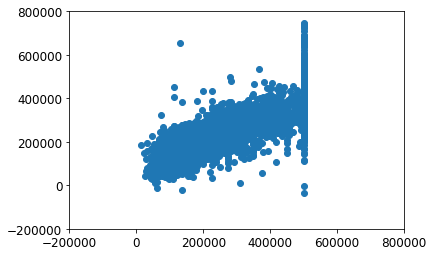

In [44]:
import matplotlib.pyplot as plt

plt.scatter(x=y_te, y=y_te_estimation)
plt.xlim([-200000,800000])
plt.ylim([-200000,800000])
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

final_model = grid_search_lr.best_estimator_   

y_te_estimation = final_model.predict(X_te_scale)

final_mse = mean_squared_error(y_te, y_te_estimation )
final_rmse = np.sqrt(final_mse)
print(final_rmse) 


67082.76629127834


In [46]:
from sklearn.metrics import explained_variance_score
variance_score=explained_variance_score(y_te, y_te_estimation,multioutput='raw_values')
print(variance_score)
r2_score_lr= r2_score(y_te,y_te_estimation)
print(r2_score_lr)

[0.66246906]
0.6624682468170402


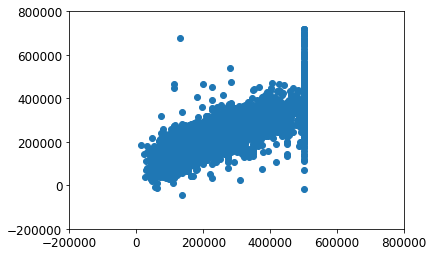

In [47]:
import matplotlib.pyplot as plt

plt.scatter(x=y_te, y=y_te_estimation)
plt.xlim([-200000,800000])
plt.ylim([-200000,800000])
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

final_model = grid_search_er.best_estimator_   ## grid_search SHOULD BE THE BEST GRID SEARCH ##

y_te_estimation = final_model.predict(X_te_scale)

final_mse = mean_squared_error(y_te, y_te_estimation)
final_rmse = np.sqrt(final_mse)
print(final_rmse) 


66046.31060516814


In [49]:
from sklearn.metrics import explained_variance_score
variance_score=explained_variance_score(y_te, y_te_estimation,multioutput='raw_values')
print(variance_score)
r2_score_er= r2_score(y_te,y_te_estimation)
print(r2_score_er)

[0.67281849]
0.6728176752980618


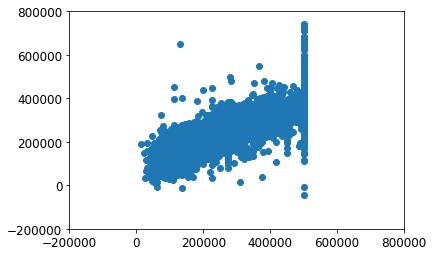

In [50]:
import matplotlib.pyplot as plt

plt.scatter(x=y_te, y=y_te_estimation)
plt.xlim([-200000,800000])
plt.ylim([-200000,800000])
plt.show()

**Q1: Before you computed the final_rmse on the test data, what was your expected value for this quantity? Does your best model have high variance?**

<pre>
Analysing all the three models, we can observe that the elastic net regression has performed much better than the rest
of the models. It has RMSE: 66088.64421147981 which is the least error we have got.Before computing th efinal_rmse on 
the test data, the expected value was around 66088.64421147981 or high, not much higher than the final_rmse. But for the test data,
we have got a lesser RMSE than expected which is: 66046.31060516814
Variance is : 0.67281849
Difference between the error measures, on how our model has performed on test data and train data:
66088.64421147981 - 66046.31060516814
Our model does not have high variance, and instead it has a low Variance measure. </pre>